#Лабораторная работа №1
Создание нейронной сети, выполняющей бинарную классификацию

**Задание:**
Создать модель (без использования готовых решений) простейшего перцептрона, которая будет выполнять функцию логического "ИЛИ".

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, numbers_of_epochs = 100, learning_rate = 0.1):
        self.numbers_of_epochs = numbers_of_epochs
        self.learning_rate = learning_rate

    def train(self, X, y):
        num_features = X.shape[1]
        self.w = np.zeros(num_features + 1)
        for i in range(self.numbers_of_epochs):
          for sample, answer in zip(X, y):
              prediction = self.predict(sample)
              difference = (answer - prediction)
              w_update = difference * self.learning_rate
              self.w[1:] += w_update * sample
              self.w[0]  += w_update

    def predict(self, sample):
        output  = np.dot(sample, self.w[1:]) + self.w[0]
        return np.where( output > 0 , 1, 0)

    def score(self, X, y):
        pred = self.predict(X)
        pred.shape = -1, 1
        accuracy = np.sum(np.where( pred == y , 1, 0))/ len(y) * 100
        return accuracy

    def w_get(self):
        return self.w



In [ ]:
import random

def genration_data(numbers = 10, lvl_noise = 10):
  X = np.array([[random.choice([0,1]), random.choice([0,1])] for i in range(numbers)])
  y = (X[:, 0] | X[:, 1])
  noise_X = X +  np.array([[random.randint(-lvl_noise, lvl_noise) * 0.01,random.randint(-lvl_noise, lvl_noise) * 0.01] for i in range(numbers)])
  X = noise_X
  y.shape = -1, 1
  return X, y

In [ ]:
X_train, y_train = genration_data(numbers = 1000, lvl_noise = 45)
np.hstack([X_train, y_train])

array([[ 0.1 ,  1.31,  1.  ],
       [ 0.67, -0.37,  1.  ],
       [-0.26,  0.23,  0.  ],
       ...,
       [ 1.28,  0.25,  1.  ],
       [ 1.  ,  1.25,  1.  ],
       [-0.28,  0.39,  0.  ]])

In [ ]:
neuron = Perceptron(1, 0.1)
neuron.train(X_train, y_train)
X_test, y_test = genration_data(numbers = 1000, lvl_noise = 45)
neuron.score(X_test, y_test)

<ipython-input-23-64867c96e9e9>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.w[0]  += w_update


92.4

In [ ]:
neuron.w_get()

array([-0.1  ,  0.383,  0.303])

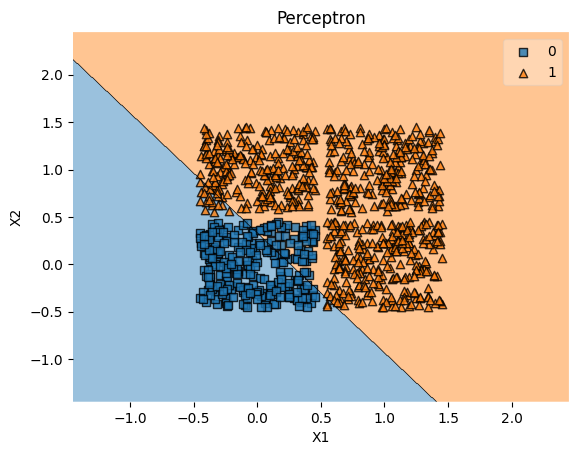

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, np.concatenate(y_test), clf=neuron)
plt.title('Perceptron')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()